In [1]:
import numpy as np      # linear algebra
import pandas as pd     # data processing
from matplotlib import pyplot as plt
import re
from string import punctuation, digits
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from keras.layers import LSTM

In [3]:
dataset = pd.read_csv('smsturkish.csv',encoding='utf-8')
print(dataset.shape)
pd.set_option('max_colwidth', 800)
dataset = dataset.iloc[:-1]
dataset

(851, 8)


,Spam,V1,F3,F4,F5,F6,F7,F8
0,Spam,"""Mudo Outletlere once gelen kazaniyor_ Mobilya basta olmak uzere """,NaN,NaN,NaN,NaN,NaN,NaN
1,Spam,Yeni Turkcell avantaj paketleriyle yurtdisinda da rahat rahat konusabilirsiniz.Ihtiyaciniza gore sadece 15TLye gunluk 30dk yada 49TLye 1ay boyunca 90dklik konusma paketlerinden size uygun olani almak icin yurtdisina cikmadan mutlaka arayin.4440532,NaN,NaN,NaN,NaN,NaN,NaN
2,Ham,Cadde üzerinde Yeni site C blok no 3 zilde gokcer ozan tuna yaziyo,NaN,NaN,NaN,NaN,NaN,
3,Spam,"gnctrkcllli, Bonnyfood'dan lezzetli cicekler firsati. Tum urunlerde gecerli 25 .TLlik hediye ceki 1 TL! BONNY yaz 8073'e gonder. SMS ucreti 50krs. GNCTEKLIF.COM",NaN,NaN,NaN,NaN,NaN,NaN
4,Ham,nerdesin la,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
845,Spam,Kamu 1000 paketine gecerek ayda sadece 45TLye heryonle 1000dk ve 1000smse sahip olabilirsiniz.Bu muhtesem paket icin hemen KAMU yazip 2222ye gonderin,NaN,NaN,NaN,NaN,NaN,NaN
846,Ham,Canım ya kantine gelebilir misin,NaN,NaN,NaN,NaN,NaN,NaN
847,Ham,"**5992 nolu Kredi Karti Ekstre Borcunuz 1,119.25 TL Asgari Odeme Tutari 247.00 TL ve Son Odeme Tarihi 05.07.2011 dir.",NaN,NaN,NaN,NaN,NaN,NaN
848,Ham,"18/03'de kesilecek, son 4 hanesi 5403 olan kartiniza ait ekstrenize yansiyacak tutar 1132.67 TL 'ye ulasmistir. Kullanilabilir limitiniz 1423.03 TL 'dir.",NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset.drop(columns=['F3', 'F4', 'F5','F6','F7','F8'],inplace=True)
dataset.rename(columns= {'Spam':'label','V1':'message'},inplace=True)
dataset

,label,message
0,Spam,"""Mudo Outletlere once gelen kazaniyor_ Mobilya basta olmak uzere """
1,Spam,Yeni Turkcell avantaj paketleriyle yurtdisinda da rahat rahat konusabilirsiniz.Ihtiyaciniza gore sadece 15TLye gunluk 30dk yada 49TLye 1ay boyunca 90dklik konusma paketlerinden size uygun olani almak icin yurtdisina cikmadan mutlaka arayin.4440532
2,Ham,Cadde üzerinde Yeni site C blok no 3 zilde gokcer ozan tuna yaziyo
3,Spam,"gnctrkcllli, Bonnyfood'dan lezzetli cicekler firsati. Tum urunlerde gecerli 25 .TLlik hediye ceki 1 TL! BONNY yaz 8073'e gonder. SMS ucreti 50krs. GNCTEKLIF.COM"
4,Ham,nerdesin la
...,...,...
845,Spam,Kamu 1000 paketine gecerek ayda sadece 45TLye heryonle 1000dk ve 1000smse sahip olabilirsiniz.Bu muhtesem paket icin hemen KAMU yazip 2222ye gonderin
846,Ham,Canım ya kantine gelebilir misin
847,Ham,"**5992 nolu Kredi Karti Ekstre Borcunuz 1,119.25 TL Asgari Odeme Tutari 247.00 TL ve Son Odeme Tarihi 05.07.2011 dir."
848,Ham,"18/03'de kesilecek, son 4 hanesi 5403 olan kartiniza ait ekstrenize yansiyacak tutar 1132.67 TL 'ye ulasmistir. Kullanilabilir limitiniz 1423.03 TL 'dir."


In [5]:
dataset.label.value_counts()

Ham     430
Spam    420
Name: label, dtype: int64

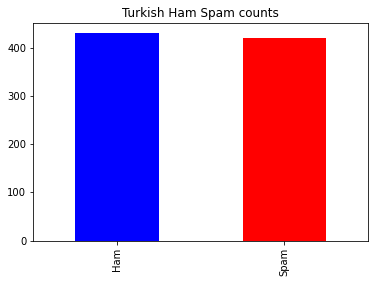

In [6]:
dataset.label.value_counts().plot(kind = 'bar', color = ['blue','red'])
plt.title('Turkish Ham Spam counts')
plt.show()

<AxesSubplot:ylabel='label'>

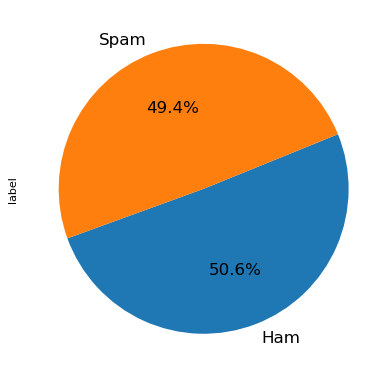

In [19]:
fig = plt.figure(figsize=(6,6), dpi=80)
ax = plt.subplot(111)

dataset.label.value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=200, fontsize=15)

In [12]:
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize 

data = []

for i in range(dataset.shape[0]):
    sms = dataset.iloc[i, 1]
    
    # remove non alphabatic characters
    sms = re.sub('[^A-Za-z]', ' ', sms)
    
    # make words lowercase
    sms = sms.lower()
    
    #split message data into words 
    tokenized_sms = word_tokenize(sms) 
    
    # remove stop words and stemming
    sms_processed = []
    for word in tokenized_sms:
        if word not in set(stopwords.words('Turkish')):
            sms_processed.append(word)
    
    
    sms_text = " ".join(sms_processed)
    data.append(sms_text)

data

[nltk_data] Downloading package stopwords to C:\Users\Fehmi
[nltk_data]     Çakmak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['mudo outletlere once gelen kazaniyor mobilya basta olmak uzere',
 'yeni turkcell avantaj paketleriyle yurtdisinda rahat rahat konusabilirsiniz ihtiyaciniza gore sadece tlye gunluk dk yada tlye ay boyunca dklik konusma paketlerinden size uygun olani almak icin yurtdisina cikmadan mutlaka arayin',
 'cadde zerinde yeni site c blok no zilde gokcer ozan tuna yaziyo',
 'gnctrkcllli bonnyfood dan lezzetli cicekler firsati tum urunlerde gecerli tllik hediye ceki tl bonny yaz e gonder sms ucreti krs gncteklif com',
 'nerdesin la',
 'sizi arayan turkcell numaralarinin kime ait oldugunu sadece kurusa ogrenmek icin numarayi yazip ye gonderin ornek xxxxxxxxx',
 'tlyukle com dan asistans otel konaklam firsati plus uyelik ilgili ayrintili bilgi icin ozel musteri temsilciniz ismail ozefe sizi arayacaktir',
 'hey barmen ictiyse aynisindan istiyorum',
 'nisana kadar altin yazip a gonderin altin bonusa basvurun',
 'sey cocuklarimizin gelecegi icin hafta subemizde duzenlenen kumbara fonu gunlerine sizi 

In [13]:
# creating the feature matrix 
from sklearn.feature_extraction.text import CountVectorizer

matrix = CountVectorizer(max_features=50)
X = matrix.fit_transform(data).toarray()
y = dataset['label'].map( {'Spam': 1, 'Ham': 0})

In [14]:
# split train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
# K-Neighbors Classifier
kneighbors = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
kneighbors.fit(X_train, y_train)

print("Training Accuracy:", kneighbors.score(X_train, y_train))

predict_knn = kneighbors.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_knn))
print('Precision score: ', precision_score(y_test, predict_knn, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_knn, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_knn, average='weighted'))

Training Accuracy: 0.9397058823529412

Testing Accuracy: 0.8941176470588236
Precision score:  0.8999170342623853
Recall score:     0.8941176470588236
F1 score:         0.8938975479326985


In [16]:
#cross validation for KNN
fbeta_scorer = make_scorer(fbeta_score, beta = 0.5)

def validation_score(model_name):
    scores = cross_val_score(model_name, X_train, y_train, cv=10, scoring=fbeta_scorer) 
    return scores

kneighbors_val_score = validation_score(kneighbors)
print(kneighbors_val_score, "\n")
print("Average cross-validation F-beta score:", kneighbors_val_score.mean())

[0.94936709 0.94202899 0.95890411 0.94890511 0.93023256 0.96551724
 0.95744681 0.93984962 0.94771242 0.89655172] 

Average cross-validation F-beta score: 0.9436515667721151


In [17]:
# Random Forest
randFor = RandomForestClassifier()
randFor.fit(X_train, y_train)

print("Training Accuracy:", randFor.score(X_train, y_train))

predict_rf = randFor.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_rf))
print('Precision score: ', precision_score(y_test, predict_rf, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_rf, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_rf, average='weighted'))

Training Accuracy: 0.9838235294117647

Testing Accuracy: 0.9470588235294117
Precision score:  0.9475735294117648
Recall score:     0.9470588235294117
F1 score:         0.9470202888267713


In [18]:
#cross validation for Random Forest
randFor_val_score = validation_score(randFor)
print(randFor_val_score, "\n")
print("Average cross-validation F-beta score:", randFor_val_score.mean())

[0.95679012 0.94117647 0.9939759  0.96273292 0.96273292 0.97633136
 0.93167702 0.96969697 0.94674556 0.89595376] 

Average cross-validation F-beta score: 0.9537813004801666


In [19]:
# Logistic Regression
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

print("Training Accuracy:", logReg.score(X_train, y_train))

predict_lg = logReg.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_lg))
print('Precision score: ', precision_score(y_test, predict_lg, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_lg, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_lg, average='weighted'))

Training Accuracy: 0.9588235294117647

Testing Accuracy: 0.9294117647058824
Precision score:  0.9304414412212746
Recall score:     0.9294117647058824
F1 score:         0.9294117647058824


In [20]:
#cross validation for Logistic Regression
logReg_val_score = validation_score(logReg)
print(logReg_val_score, "\n")
print("Average cross-validation F-beta score:", logReg_val_score.mean())

[0.98101266 0.95890411 0.9939759  0.95541401 0.97315436 0.96969697
 0.90062112 0.98039216 0.96969697 0.92356688] 

Average cross-validation F-beta score: 0.9606435139836303


In [21]:
#fitting a Multinomial Naive Bayes Classifier Model 
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

print("Training Accuracy:", naive_bayes.score(X_train, y_train))

predict_nb = naive_bayes.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_nb))
print('Precision score: ', precision_score(y_test, predict_nb, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_nb, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_nb, average='weighted'))

Training Accuracy: 0.9544117647058824

Testing Accuracy: 0.9470588235294117
Precision score:  0.9475735294117648
Recall score:     0.9470588235294117
F1 score:         0.9470202888267713


In [22]:
#cross validation for Naive Bayes
naive_bayes_val_score = validation_score(naive_bayes)
print(naive_bayes_val_score, "\n")
print("Average cross-validation F-beta score:", naive_bayes_val_score.mean())

[0.93373494 0.94117647 0.96385542 0.96273292 0.98726115 0.96969697
 0.93939394 0.91715976 0.96969697 0.88757396] 

Average cross-validation F-beta score: 0.9472282504384022


In [23]:
#Support Vector Machine with linear kernel
svc = SVC(kernel = 'linear', C = 1.0)
svc.fit(X_train, y_train)

print("Training Accuracy:", svc.score(X_train, y_train))

predict_svm = svc.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_svm))
print('Precision score: ', precision_score(y_test, predict_svm, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_svm, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_svm, average='weighted'))

Training Accuracy: 0.9691176470588235

Testing Accuracy: 0.9411764705882353
Precision score:  0.9413886236975023
Recall score:     0.9411764705882353
F1 score:         0.941152015129777


In [24]:
#cross validation for Support Vector Machine
svc_val_score = validation_score(svc)
print(svc_val_score, "\n")
print("Average cross-validation F-beta score:", svc_val_score.mean())

[0.98101266 0.96385542 0.97701149 0.98039216 0.95541401 0.97633136
 0.94771242 0.99378882 0.97633136 0.90909091] 

Average cross-validation F-beta score: 0.9660940612929897


In [25]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)

print("Training Accuracy:", dtc.score(X_train, y_train))

predict_dtc = dtc.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_dtc))
print('Precision score: ', precision_score(y_test, predict_dtc, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_dtc, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_dtc, average='weighted'))

Training Accuracy: 0.9044117647058824

Testing Accuracy: 0.8705882352941177
Precision score:  0.8813577344509333
Recall score:     0.8705882352941177
F1 score:         0.8699591503267974


In [26]:
#cross validation for Decision Tree
dtc_val_score = validation_score(dtc)
print(dtc_val_score, "\n")
print("Average cross-validation F-beta score:", dtc_val_score.mean())

[0.94155844 0.91549296 0.95070423 0.88235294 0.93959732 0.93984962
 0.89655172 0.89655172 0.91240876 0.85271318] 

Average cross-validation F-beta score: 0.9127780891024418


In [27]:
#Ada Boost Classifier
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
abc.fit(X_train, y_train)

print("Training Accuracy:", abc.score(X_train, y_train))

predict_abc = abc.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_abc))
print('Precision score: ', precision_score(y_test, predict_abc, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_abc, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_abc, average='weighted'))

Training Accuracy: 0.961764705882353

Testing Accuracy: 0.9352941176470588
Precision score:  0.9353722884502638
Recall score:     0.9352941176470588
F1 score:         0.935300836613071


In [28]:
#cross validation for Ada Boost Classifier
abc_val_score = validation_score(abc)
print(abc_val_score, "\n")
print("Average cross-validation F-beta score:", abc_val_score.mean())

[0.95679012 0.94936709 0.97058824 0.95541401 0.98039216 0.96273292
 0.91503268 0.91715976 0.96969697 0.88757396] 

Average cross-validation F-beta score: 0.9464747913460941


In [29]:
# XGBoost Classifier
xgb = XGBClassifier(n_estimators=50,random_state=2, use_label_encoder=False, eval_metric='rmse')
xgb.fit(X_train, y_train)

print("Training Accuracy:", xgb.score(X_train, y_train))

predict_xgb = xgb.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_xgb))
print('Precision score: ', precision_score(y_test, predict_xgb, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_xgb, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_xgb, average='weighted'))

Training Accuracy: 0.9764705882352941

Testing Accuracy: 0.9352941176470588
Precision score:  0.9358901700214969
Recall score:     0.9352941176470588
F1 score:         0.9353008347530852


In [30]:
#cross validation for XGBoost Classifier
xgb_val_score = validation_score(xgb)
print(xgb_val_score, "\n")
print("Average cross-validation F-beta score:", xgb_val_score.mean())

[0.95679012 0.94936709 1.         0.96273292 0.96969697 0.93167702
 0.96969697 0.93167702 0.96273292 0.88757396] 

Average cross-validation F-beta score: 0.9521944991731764


In [31]:
# Stochastic Gradient Descent Classifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

print("Training Accuracy:", sgd.score(X_train, y_train))

predict_sgd = sgd.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_sgd))
print('Precision score: ', precision_score(y_test, predict_sgd, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_sgd, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_sgd, average='weighted'))

Training Accuracy: 0.9735294117647059

Testing Accuracy: 0.9235294117647059
Precision score:  0.923609211126311
Recall score:     0.9235294117647059
F1 score:         0.9235373523609022


In [32]:
#cross validation for Stochastic Gradient Descent
sgd_val_score = validation_score(sgd)
print(sgd_val_score, "\n")
print("Average cross-validation F-beta score:", sgd_val_score.mean())

[0.95679012 0.95679012 0.97058824 0.96273292 0.96273292 0.96273292
 0.93167702 0.94674556 0.97633136 0.87878788] 

Average cross-validation F-beta score: 0.9505909060470016


In [33]:
#Initialising ANN
ann = Sequential()
 #Adding First Hidden Layer
ann.add(Dense(units=6,activation="relu"))
#Adding Second Hidden Layer
ann.add(Dense(units=6,activation="relu"))
#Adding Output Layer
ann.add(Dense(units=1,activation="sigmoid"))
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
#Fitting ANN
history = ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs = 50)

Epoch 1/50
22/22 [==============================] - 1s 10ms/step - loss: 0.7036 - accuracy: 0.6382 - val_loss: 0.6939 - val_accuracy: 0.6824
Epoch 2/50
22/22 [==============================] - 0s 2ms/step - loss: 0.6706 - accuracy: 0.7706 - val_loss: 0.6651 - val_accuracy: 0.7765
Epoch 3/50
22/22 [==============================] - 0s 2ms/step - loss: 0.6400 - accuracy: 0.8574 - val_loss: 0.6345 - val_accuracy: 0.8353
Epoch 4/50
22/22 [==============================] - 0s 2ms/step - loss: 0.6069 - accuracy: 0.8941 - val_loss: 0.6006 - val_accuracy: 0.9059
Epoch 5/50
22/22 [==============================] - 0s 2ms/step - loss: 0.5696 - accuracy: 0.9132 - val_loss: 0.5611 - val_accuracy: 0.9412
Epoch 6/50
22/22 [==============================] - 0s 2ms/step - loss: 0.5256 - accuracy: 0.9206 - val_loss: 0.5149 - val_accuracy: 0.9412
Epoch 7/50
22/22 [==============================] - 0s 2ms/step - loss: 0.4795 - accuracy: 0.9294 - val_loss: 0.4683 - val_accuracy: 0.9471
Epoch 8/50
22/22 [=

In [34]:
loss, accuracy = ann.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))

loss, accuracy = ann.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

Training Accuracy: 0.9765
Training Loss: 0.0934
Testing Accuracy:  0.9412
Testing Loss:  0.1699


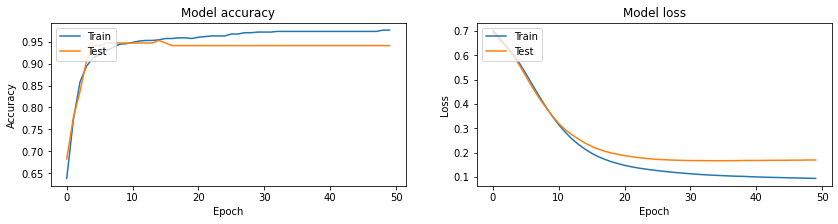

In [35]:
# Plot training & validation accuracy values

plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [36]:
# create the CNN model
cnn = Sequential()
cnn.add(Embedding(1000, 64, input_length=50))
cnn.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))
cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 64)            64000     
                                                                 
 conv1d (Conv1D)             (None, 50, 128)           32896     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 25, 128)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 25, 64)            32832     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 12, 64)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 12, 32)           

In [37]:
# Fit the model
history = cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
17/17 [==============================] - 1s 20ms/step - loss: 0.6330 - accuracy: 0.5790 - val_loss: 0.4791 - val_accuracy: 0.8603
Epoch 2/50
17/17 [==============================] - 0s 12ms/step - loss: 0.3719 - accuracy: 0.8658 - val_loss: 0.2722 - val_accuracy: 0.9191
Epoch 3/50
17/17 [==============================] - 0s 12ms/step - loss: 0.2533 - accuracy: 0.9044 - val_loss: 0.2396 - val_accuracy: 0.9265
Epoch 4/50
17/17 [==============================] - 0s 11ms/step - loss: 0.2295 - accuracy: 0.9136 - val_loss: 0.2179 - val_accuracy: 0.9338
Epoch 5/50
17/17 [==============================] - 0s 12ms/step - loss: 0.2265 - accuracy: 0.9136 - val_loss: 0.2167 - val_accuracy: 0.9118
Epoch 6/50
17/17 [==============================] - 0s 12ms/step - loss: 0.1879 - accuracy: 0.9228 - val_loss: 0.1995 - val_accuracy: 0.9338
Epoch 7/50
17/17 [==============================] - 0s 12ms/step - loss: 0.1640 - accuracy: 0.9412 - val_loss: 0.1952 - val_accuracy: 0.9706
Epoch 8/50
17

In [38]:
loss, accuracy = cnn.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))

loss, accuracy = cnn.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

Training Accuracy: 0.9765
Training Loss: 0.1218
Testing Accuracy:  0.9412
Testing Loss:  0.3830


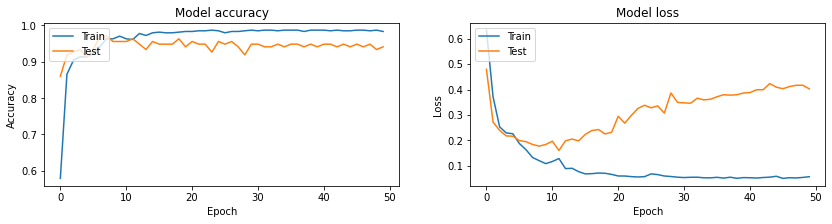

In [39]:
# Plot training & validation accuracy values
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [40]:
# Create the LSTM Model
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=64, input_length=50))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 64)            64000     
                                                                 
 lstm (LSTM)                 (None, 100)               66000     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 130,101
Trainable params: 130,101
Non-trainable params: 0
_________________________________________________________________


In [41]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
17/17 [==============================] - 2s 48ms/step - loss: 0.6823 - accuracy: 0.5919 - val_loss: 0.6606 - val_accuracy: 0.5074
Epoch 2/50
17/17 [==============================] - 0s 23ms/step - loss: 0.5982 - accuracy: 0.6507 - val_loss: 0.5779 - val_accuracy: 0.6985
Epoch 3/50
17/17 [==============================] - 0s 25ms/step - loss: 0.4380 - accuracy: 0.8143 - val_loss: 0.3552 - val_accuracy: 0.8235
Epoch 4/50
17/17 [==============================] - 0s 23ms/step - loss: 0.3709 - accuracy: 0.8640 - val_loss: 0.3147 - val_accuracy: 0.8750
Epoch 5/50
17/17 [==============================] - 0s 23ms/step - loss: 0.3953 - accuracy: 0.8566 - val_loss: 0.3425 - val_accuracy: 0.8529
Epoch 6/50
17/17 [==============================] - 0s 23ms/step - loss: 0.3238 - accuracy: 0.8676 - val_loss: 0.3222 - val_accuracy: 0.8529
Epoch 7/50
17/17 [==============================] - 0s 23ms/step - loss: 0.2979 - accuracy: 0.8879 - val_loss: 0.3183 - val_accuracy: 0.8971
Epoch 8/50
17

In [42]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))

loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

Training Accuracy: 0.9235
Training Loss: 0.2017
Testing Accuracy:  0.9294
Testing Loss:  0.1960


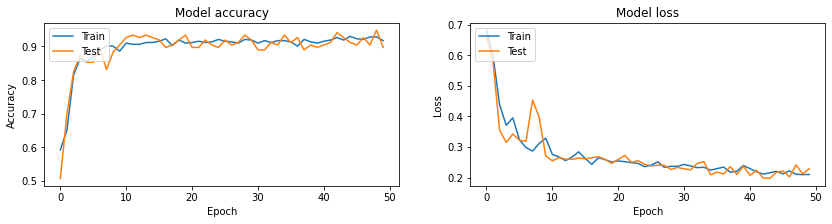

In [43]:
# Plot training & validation accuracy values

plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()